In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset
df_colesterol = pd.read_csv('datasets/dataset_colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [6]:
# Remover coluna ID
df_colesterol.drop('Id', axis=1, inplace=True)

In [7]:
df_colesterol.head()

,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [10]:
# Renomar colunas
df_colesterol.columns = ['grupo_sanguineo', 'fumante', 'nivel_atividade_fisica', 'idade', 'peso', 'altura', 'nivel_colesterol']

In [11]:
df_colesterol.head()

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [12]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [15]:
# Copiar DF para DF bucket
df_colesterol_bucket = df_colesterol.copy()

# EDA

In [17]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [18]:
# Verificar os tipos de dados unicos de fumantes
df_colesterol_eda['fumante'].unique()

array(['Sim', 'Não', nan], dtype=object)

In [19]:
# Verificar os tipos de dados unicos de nivel de atividade fisica
df_colesterol_eda['nivel_atividade_fisica'].unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [21]:
# Verificar os valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [22]:
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [24]:
# Coletar medidas das variaveis categoricas
moda_grupo_sanguineo = df_colesterol_eda['grupo_sanguineo'].mode()
moda_fumante = df_colesterol_eda['fumante'].mode()
moda_nivel_atividade_fisica = df_colesterol_eda['nivel_atividade_fisica'].mode()

In [25]:
# Coletar medidas das variaveis numericas
media_idade = df_colesterol_eda['idade'].mean()
media_peso = df_colesterol_eda['peso'].mean()   
media_altura = df_colesterol_eda['altura'].mean()

In [35]:
# Preencher valores ausentes
df_colesterol_eda.fillna(value={
    'grupo_sanguineo': moda_grupo_sanguineo[0],
    'fumante': moda_fumante[0],
    'nivel_atividade_fisica': moda_nivel_atividade_fisica[0],
    'idade': media_idade,
    'peso': media_peso,
    'altura': media_altura    
}, inplace=True)

In [36]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   float64
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [37]:
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [38]:
# Converter idade e altura para o tipo inteiro
df_colesterol_eda['idade'] = df_colesterol_eda['idade'].astype(int)
df_colesterol_eda['altura'] = df_colesterol_eda['altura'].astype(int)

- Observação: Por isso é uma boa prática sempre tratar os valores ausentes, caso contrário essa conversão de tipo falharia nos valores ausentes.

In [39]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int32  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int32  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 47.0+ KB


<Axes: >

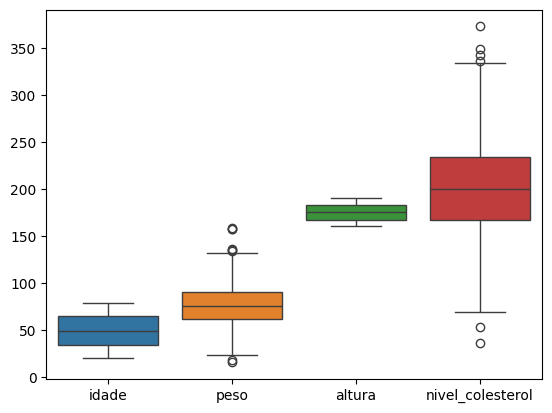

In [40]:
# Verificar outliers
sns.boxplot(data=df_colesterol_eda)

<Axes: xlabel='peso'>

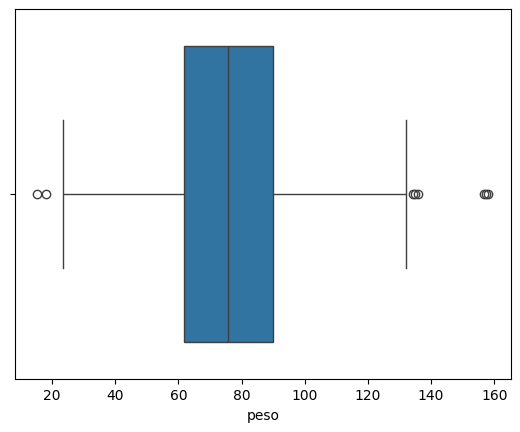

In [42]:
# Verificar outliers no peso
sns.boxplot(data=df_colesterol_eda['peso'], orient='h')

In [47]:
# Filtrar o publico a ser removido pelo peso
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

37

In [48]:
# Remover publico com peso menor que 40
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, inplace=True)

<Axes: xlabel='peso'>

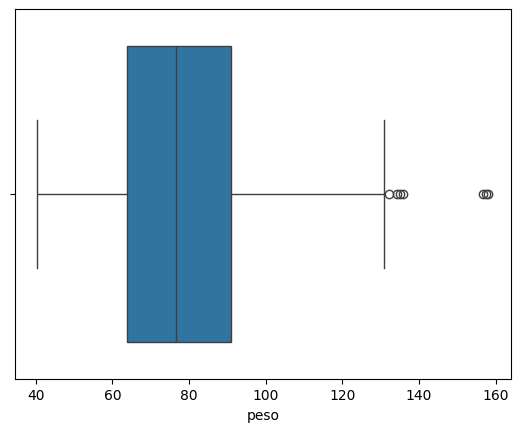

In [49]:
# Verificar outliers no peso
sns.boxplot(data=df_colesterol_eda['peso'], orient='h')

<Axes: xlabel='nivel_colesterol'>

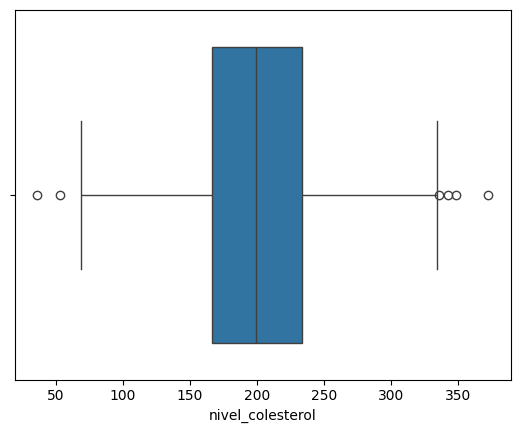

In [43]:
# Verificar outliers no nível do colesterol
sns.boxplot(data=df_colesterol_eda['nivel_colesterol'], orient='h')

In [51]:
# Filtrar o publico a ser removido pelo nível do colesterol
df_colesterol_eda[df_colesterol_eda['nivel_colesterol'] > 300].nivel_colesterol.count()

22

- No caso do nível do colesterol os valores altos podem fazer sentido, por isso não iremos remover esses outliers.

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

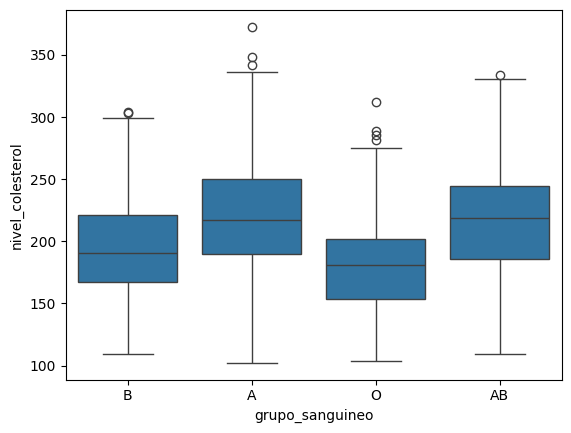

In [55]:
# Cruzamento de variaveis Categoricas com Nivel de colesterol (grupo_sanguineo)
sns.boxplot(x='grupo_sanguineo', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

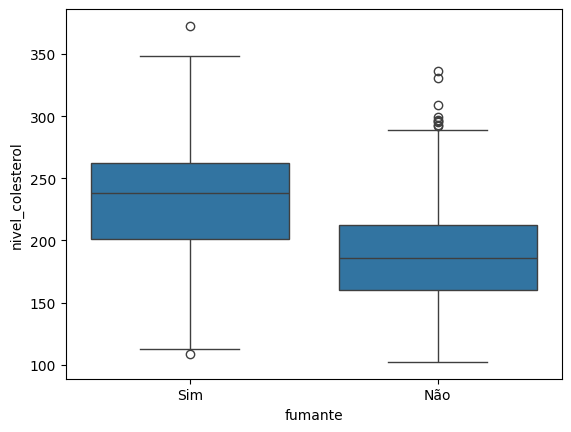

In [56]:
# Cruzamento de variaveis Categoricas com Nivel de colesterol (fumante)
sns.boxplot(x='fumante', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

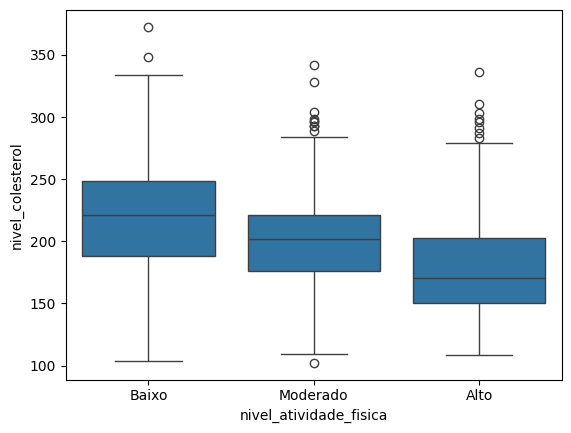

In [57]:
# Cruzamento de variaveis Categoricas com Nivel de colesterol (nivel_atividade_fisica)
sns.boxplot(x='nivel_atividade_fisica', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

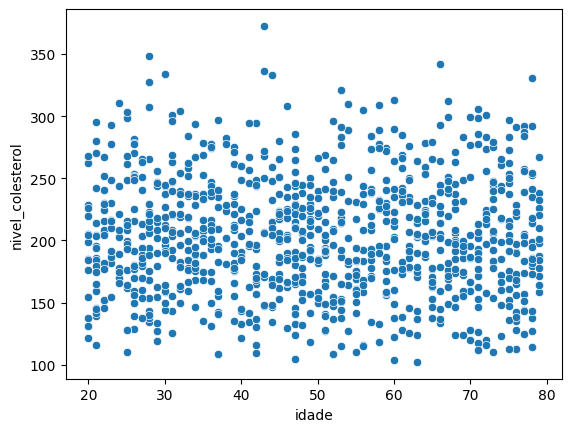

In [58]:
# Cruzamento variáveis numericas com Nivel de colesterol (idade)
sns.scatterplot(x='idade', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

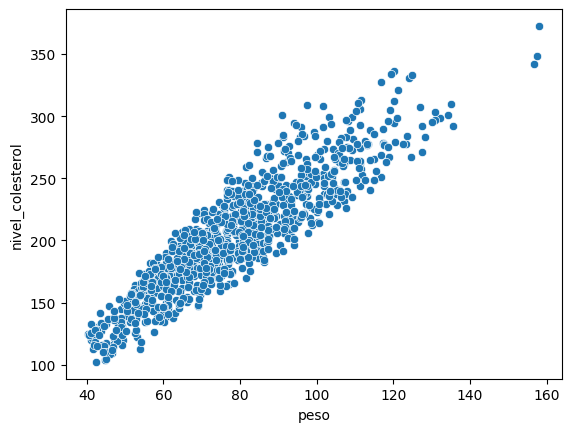

In [59]:
# Cruzamento variáveis numericas com Nivel de colesterol (peso)
sns.scatterplot(x='peso', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

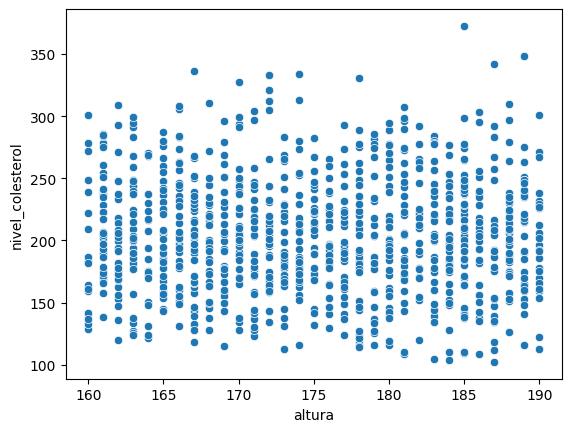

In [60]:
# Cruzamento variáveis numericas com Nivel de colesterol (altura)
sns.scatterplot(x='altura', y='nivel_colesterol', data=df_colesterol_eda)